In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import hashlib,pandas

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [4]:
def hashKnife(i):
    sha256 = hashlib.sha256()
    sha256.update('{0}'.format(i).encode('utf-8'))
    s1 = sha256.hexdigest()
    sha256 = hashlib.sha256()
    sha256.update('{0}'.format(s1).encode('utf-8'))
    return sha256.hexdigest()

In [5]:
for i in range(100):
    h = hashKnife(i)
    if h[0:1] == "0":
        print(i,"\t",hashKnife(i))

4 	 033c339a7975542785be7423a5b32fa8047813689726214143cdd7939747709c
21 	 053b22ca1fcea7a8de0da76b0f4deaef4aa9fb1100bff13965c3c0da76272862
31 	 028f917950de90c724f3dacb96792258929510f54bfd4866dd6dba26e0b4414a
33 	 0cca79f951e82323381375324442d5fe77e5bcb5899b87cb2f0bebff1bc0244a
83 	 0401167548c0ed9abc4ef94cc0b43b1942030903ca05abf1e938c822d492f8a3
98 	 0a23001d74edbe05d7e79524a918f077b3928eb3ee34b3ec13d990f9a4b43e45


In [6]:
pd = pandas.read_csv("./加权.csv")

In [7]:
pd

,index,name,朋友圈加权,留言加权,广告加权,虾神点赞
0,1,锅醋姜就是我,0,2,1,0
1,2,蔚蓝天空,0,12,1,0
2,3,XYQ,0,111,1,0
3,4,Hi~我是蘇小美,0,0,1,0
4,5,LS,0,2,1,0
5,6,HelloWorld,0,0,1,0
6,7,Yang,0,2,1,0
7,8,壳乐乐,0,1,1,0
8,9,R,27,2,1,0
9,10,浩阳,24,2,1,1


In [8]:
pd["life"] = round(1 + pd["朋友圈加权"] * 0.2 \
     + pd["留言加权"]*0.1 + pd["广告加权"] + pd["虾神点赞"])

In [9]:
pd2 = pd.drop(14)

In [10]:
pd2.sort_values("life",ascending=False).head(10)

,index,name,朋友圈加权,留言加权,广告加权,虾神点赞,life
22,23,其实，不懂你,85,1,0,0,18.0
11,12,孙宇,76,2,1,0,17.0
20,21,会跳舞的文艺青年,70,0,1,1,17.0
2,3,XYQ,0,111,1,0,13.0
19,20,柳好肥,36,1,1,0,9.0
8,9,R,27,2,1,0,8.0
9,10,浩阳,24,2,1,1,8.0
15,16,A^Hundred^Flowers,23,1,1,0,7.0
10,11,Lilly An,20,2,1,0,6.0
18,19,ChercherᝰACE,20,1,1,0,6.0


In [11]:
e = [0 for i in range(26)] + [0.1]

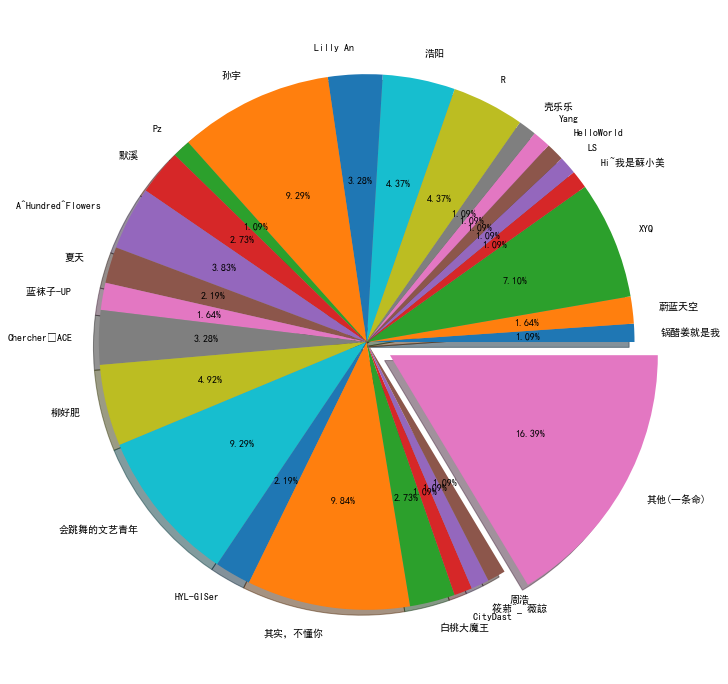

In [12]:
f = plt.figure(figsize=(12,15))
labels = pd2[pd2["life"] > 1]["name"].tolist()+["其他(一条命)"]
sizes = pd2[pd2["life"] > 1]["life"].tolist() + [sum(pd2[pd2["life"] <= 1]["life"])]
explode = (0,0,0,0.1,0,0)
plt.pie(sizes,labels=labels,explode=tuple(e),shadow=True,autopct='%1.2f%%')
pass

In [13]:
val = {}
for idx,life in zip(pd2["index"],pd2["life"]):
    if idx <10:
        idx = "0{}".format(idx)
    else:
        idx = "{}".format(idx)
    val[idx] = life

In [14]:
start = 202101081730

In [15]:
flag = 0
while True:
    flag +=1
    h = hashKnife(start + flag)
    if h[0:1] == "0":
        if h[-2:] in val:
            val[h[-2:]] -=1
            name = pd2[pd2["index"] == int(h[-2:])]["name"].tolist()[0]
            print("第 {0} 轮，攻击被触发，发动攻击的数值是 {1}\
            \n被击中战斗的同学是：{2} , 剩余生命值：{3}".format(flag,start+flag,
                                                name,val[h[-2:]]))
            if val[h[-2:]] == 0:
                del val[h[-2:]]
                print("*_* {0} 同学退出战斗……阿门~~~".format(name))
                if len(val) <= 5:
                    print("\n\n 战斗结束……恭喜以下同学获奖：♪(^∇^*)")
                    for v in val:
                        name = pd2[pd2["index"] == int(v)]["name"].tolist()[0]
                        print("{0}\t 剩余生命值：{1}".format(name,val[v]))
                    break
                else:
                    print("还有 {0} 位同学在继续战斗\n".format(len(val)))

第 91 轮，攻击被触发，发动攻击的数值是 202101081821            
被击中战斗的同学是：汤鹏 , 剩余生命值：0.0
*_* 汤鹏 同学退出战斗……阿门~~~
还有 55 位同学在继续战斗

第 146 轮，攻击被触发，发动攻击的数值是 202101081876            
被击中战斗的同学是：小昭她哥 , 剩余生命值：0.0
*_* 小昭她哥 同学退出战斗……阿门~~~
还有 54 位同学在继续战斗

第 178 轮，攻击被触发，发动攻击的数值是 202101081908            
被击中战斗的同学是：ChercherᝰACE , 剩余生命值：5.0
第 202 轮，攻击被触发，发动攻击的数值是 202101081932            
被击中战斗的同学是：R , 剩余生命值：7.0
第 317 轮，攻击被触发，发动攻击的数值是 202101082047            
被击中战斗的同学是：郭家乐 , 剩余生命值：0.0
*_* 郭家乐 同学退出战斗……阿门~~~
还有 53 位同学在继续战斗

第 363 轮，攻击被触发，发动攻击的数值是 202101082093            
被击中战斗的同学是：金喜william , 剩余生命值：0.0
*_* 金喜william 同学退出战斗……阿门~~~
还有 52 位同学在继续战斗

第 380 轮，攻击被触发，发动攻击的数值是 202101082110            
被击中战斗的同学是：、Fresh , 剩余生命值：0.0
*_* 、Fresh 同学退出战斗……阿门~~~
还有 51 位同学在继续战斗

第 393 轮，攻击被触发，发动攻击的数值是 202101082123            
被击中战斗的同学是：会跳舞的文艺青年 , 剩余生命值：16.0
第 449 轮，攻击被触发，发动攻击的数值是 202101082179            
被击中战斗的同学是：HelloWorld , 剩余生命值：0.0
*_* HelloWorld 同学退出战斗……阿门~~~
还有 50 位同学在继续战斗

第 493 轮，攻击被触发，发动攻击的数值是 202101082223            
被击中战斗的同学是：M I 

被击中战斗的同学是：R , 剩余生命值：1.0
第 25251 轮，攻击被触发，发动攻击的数值是 202101106981            
被击中战斗的同学是：HYL-GISer , 剩余生命值：0.0
*_* HYL-GISer 同学退出战斗……阿门~~~
还有 9 位同学在继续战斗

第 25735 轮，攻击被触发，发动攻击的数值是 202101107465            
被击中战斗的同学是：XYQ , 剩余生命值：6.0
第 26457 轮，攻击被触发，发动攻击的数值是 202101108187            
被击中战斗的同学是：R , 剩余生命值：0.0
*_* R 同学退出战斗……阿门~~~
还有 8 位同学在继续战斗

第 26619 轮，攻击被触发，发动攻击的数值是 202101108349            
被击中战斗的同学是：XYQ , 剩余生命值：5.0
第 27033 轮，攻击被触发，发动攻击的数值是 202101108763            
被击中战斗的同学是：柳好肥 , 剩余生命值：0.0
*_* 柳好肥 同学退出战斗……阿门~~~
还有 7 位同学在继续战斗

第 27427 轮，攻击被触发，发动攻击的数值是 202101109157            
被击中战斗的同学是：XYQ , 剩余生命值：4.0
第 28500 轮，攻击被触发，发动攻击的数值是 202101110230            
被击中战斗的同学是：孙宇 , 剩余生命值：4.0
第 28582 轮，攻击被触发，发动攻击的数值是 202101110312            
被击中战斗的同学是：其实，不懂你 , 剩余生命值：12.0
第 28644 轮，攻击被触发，发动攻击的数值是 202101110374            
被击中战斗的同学是：A^Hundred^Flowers  , 剩余生命值：2.0
第 28749 轮，攻击被触发，发动攻击的数值是 202101110479            
被击中战斗的同学是：蔚蓝天空 , 剩余生命值：2.0
第 28820 轮，攻击被触发，发动攻击的数值是 202101110550            
被击中战斗的同学是：会跳舞的文艺青年 , 剩余生命值：8